### To use Ascam soft : https://github.com/AGPlested/ASCAM

### First you need to install ascam:
You need to clone the github repo: either in the GitHub desktop app or type in you termninal (or git bash):
```
git clone https://github.com/AGPlested/ASCAM.git
```
Windows : Open an anaconda terminal (or conda, miniforge).
MacOS: Open the terminal
Go to your ascam folder:
```
cd ~/Document/Github/ASCAM 
```
Create a new environment and activate it:
```
conda create --name ASCAM python=3.10 numpy=1.24.* && conda activate ASCAM
```
Then install Ascam:
```
pip install -e .
```
You can then Open Ascam soft by writing:
```
ascam
```

In [13]:
from scipy.io import savemat, loadmat
from glob import glob
import numpy as np
from open_abf import plot_swps, get_sweeps, swp_window, get_protocol, files_from_protocol
%matplotlib widget

###  This will take you abf file and create .mat files from them that you can open with.

In [10]:
def abf_to_mat(f):
    swps, swp_time, sr = get_sweeps(f)
    mat = {'c001_Time\x00\x00\x00\xa0\x0f\x00\x00':swp_time}
    i = 2
    for swp in swps:
        mat[f'c{i:03}_Ipatch\x00\xa0\x0f\x00\x00'] = swp[0]
        i += 1
        mat[f'c{i:03}_Piezo_Com\x00\x00'] = swp[1]
        i += 1
        mat[f'c{i:03}_10Vm\x00\x00\x00\xa0\x0f\x00\x00'] = swp[1]
        i += 1
    savemat(f[:-4]+'.mat',mat)

### List the abf you want to use.

In [4]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/"
abf_files = glob(pathToData+"Gly/*.abf")
abf_files

['/home/alan/Documents/LAB/CSHL/Data/Gly/2024_06_11_0003.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Gly/2024_06_11_0002.abf']

### Run the loop over the files 

In [6]:
for f in abf_files:
    abf_to_mat(f)

### check you .mat files (useable by ascam)

In [7]:
mat_files = glob(pathToData+"Gly/*.mat")
mat_files

['/home/alan/Documents/LAB/CSHL/Data/Gly/2024_06_11_0002.mat',
 '/home/alan/Documents/LAB/CSHL/Data/Gly/2024_06_11_0003.mat']

### If you want to select only a window for your current to be seen in ascam. 

In [11]:
def abf_to_mat_window(f,start,end):
    swps, swp_time, sr = get_sweeps(f)
    I = swp_window(swps,start,end,sr,channel=0)
    V = swp_window(swps,start,end,sr,channel=1)
    mat = {'c001_Time\x00\x00\x00\xa0\x0f\x00\x00':swp_time}
    i = 2
    for swp in swps:
        mat[f'c{i:03}_Ipatch\x00\xa0\x0f\x00\x00'] = I
        i += 1
        mat[f'c{i:03}_Piezo_Com\x00\x00'] = V
        i += 1
        mat[f'c{i:03}_10Vm\x00\x00\x00\xa0\x0f\x00\x00'] = V
        i += 1
    savemat(f[:-4]+'.mat',mat)

In [9]:
abf_files

['/home/alan/Documents/LAB/CSHL/Data/Gly/2024_06_11_0003.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Gly/2024_06_11_0002.abf']

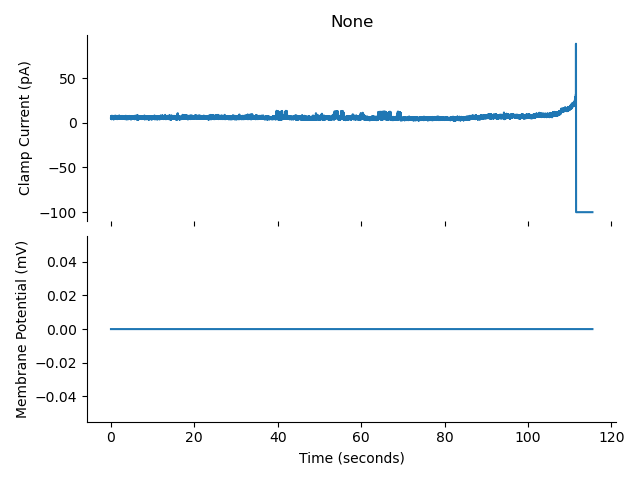

In [14]:
f = abf_files[0]
plot_swps(f)

In [15]:
abf_to_mat_window(f,0,80)

NameError: name 'v_start' is not defined

### This is just exploration you don't need to go there :)

In [15]:
path_to_mat = '/home/alan/Documents/GitHub/ASCAM/data/'
matfile = glob(path_to_mat+"*.mat")[0]
matfile

'/home/alan/Documents/GitHub/ASCAM/data/GluA2_T1_SC-recording_40kHzSR.mat'

In [6]:
mat_test = loadmat(matfile)
mat_test

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACOSX, Created on: Mon Mar 2 2020  08:54:14\x00e\x00c\x00o\x00r\x00d\x00i\x00n\x00g\x00_\x004\x000\x00k\x00H\x00z\x00S\x00R\x00.\x00m\x00a\x00t',
 '__version__': '1.0',
 '__globals__': [],
 'c001_Time\x00\x00\x00\xa0\x0f\x00\x00': array([[0.    , 0.0001, 0.0001, ..., 0.0999, 0.1   , 0.1   ]]),
 'c002_Ipatch\x00\xa0\x0f\x00\x00': array([[-0., -0., -0., ..., -0., -0., -0.]]),
 'c003_Piezo_Com\x00\x00': array([[0.0381, 0.0378, 0.0378, ..., 0.0385, 0.0378, 0.0378]]),
 'c004_10Vm\x00\x00\x00\xa0\x0f\x00\x00': array([[-0.0761, -0.0761, -0.0761, ..., -0.0761, -0.0761, -0.0761]]),
 'c005_Ipatch\x00\xa0\x0f\x00\x00': array([[-0., -0., -0., ..., -0., -0., -0.]]),
 'c006_Piezo_Com\x00\x00': array([[0.0381, 0.0375, 0.0378, ..., 0.0378, 0.0378, 0.0378]]),
 'c007_10Vm\x00\x00\x00\xa0\x0f\x00\x00': array([[-0.0761, -0.0761, -0.0761, ..., -0.0761, -0.0761, -0.0761]]),
 'c008_Ipatch\x00\xa0\x0f\x00\x00': array([[-0., -0., -0., ..., -0., -0., -0.]]),
 'c0

In [21]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/"
folders = glob(pathToData+"*")
folders

['/home/alan/Documents/LAB/CSHL/Data/Cav',
 '/home/alan/Documents/LAB/CSHL/Data/Kv',
 '/home/alan/Documents/LAB/CSHL/Data/_test.mat',
 '/home/alan/Documents/LAB/CSHL/Data/Nav']

In [22]:
files = glob(folders[0]+"/*.abf")
files

['/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0017.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0016.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0014.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0015.abf']

In [23]:
f = files[0]
## Extract the sweeps
swps, swp_time, sr = get_sweeps(f)
mat = {'c001_Time\x00\x00\x00\xa0\x0f\x00\x00':swp_time}
i = 2
for swp in swps:
    mat[f'c{i:03}_Ipatch\x00\xa0\x0f\x00\x00'] = swp[0]
    i += 1
    mat[f'c{i:03}_Piezo_Com\x00\x00'] = swp[1]
    i += 1
    mat[f'c{i:03}_10Vm\x00\x00\x00\xa0\x0f\x00\x00'] = swp[1]
    i += 1

mat

{'c001_Time\x00\x00\x00\xa0\x0f\x00\x00': array([0.    , 0.    , 0.    , ..., 0.1199, 0.12  , 0.12  ]),
 'c002_Ipatch\x00\xa0\x0f\x00\x00': array([-186.5845, -186.3403, -186.0351, ..., -135.5591, -136.9018,
        -138.916 ]),
 'c003_Piezo_Com\x00\x00': array([-100., -100., -100., ..., -100., -100., -100.]),
 'c004_10Vm\x00\x00\x00\xa0\x0f\x00\x00': array([-100., -100., -100., ..., -100., -100., -100.]),
 'c005_Ipatch\x00\xa0\x0f\x00\x00': array([-127.9907, -129.2114, -130.31  , ..., -141.7236, -141.9067,
        -141.9067]),
 'c006_Piezo_Com\x00\x00': array([-100., -100., -100., ..., -100., -100., -100.]),
 'c007_10Vm\x00\x00\x00\xa0\x0f\x00\x00': array([-100., -100., -100., ..., -100., -100., -100.]),
 'c008_Ipatch\x00\xa0\x0f\x00\x00': array([-174.4995, -174.6216, -174.9878, ..., -207.3364, -206.665 ,
        -205.9326]),
 'c009_Piezo_Com\x00\x00': array([-100., -100., -100., ..., -100., -100., -100.]),
 'c010_10Vm\x00\x00\x00\xa0\x0f\x00\x00': array([-100., -100., -100., ..., -100

In [24]:
savemat(pathToData+'_test.mat',mat)

In [25]:
files = glob(pathToData+"/*.mat")
files

['/home/alan/Documents/LAB/CSHL/Data/_test.mat']

In [26]:
loadmat(files[0])

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Jun 11 12:20:07 2024',
 '__version__': '1.0',
 '__globals__': [],
 'c001_Time\x00\x00\x00\xa0\x0f\x00\x00': array([[0.    , 0.    , 0.    , ..., 0.1199, 0.12  , 0.12  ]]),
 'c002_Ipatch\x00\xa0\x0f\x00\x00': array([[-186.5845, -186.3403, -186.0351, ..., -135.5591, -136.9018,
         -138.916 ]]),
 'c003_Piezo_Com\x00\x00': array([[-100., -100., -100., ..., -100., -100., -100.]]),
 'c004_10Vm\x00\x00\x00\xa0\x0f\x00\x00': array([[-100., -100., -100., ..., -100., -100., -100.]]),
 'c005_Ipatch\x00\xa0\x0f\x00\x00': array([[-127.9907, -129.2114, -130.31  , ..., -141.7236, -141.9067,
         -141.9067]]),
 'c006_Piezo_Com\x00\x00': array([[-100., -100., -100., ..., -100., -100., -100.]]),
 'c007_10Vm\x00\x00\x00\xa0\x0f\x00\x00': array([[-100., -100., -100., ..., -100., -100., -100.]]),
 'c008_Ipatch\x00\xa0\x0f\x00\x00': array([[-174.4995, -174.6216, -174.9878, ..., -207.3364, -206.665 ,
         -205.9326]]),
 'c009_

In [28]:
f[:-3]

'/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.'

In [35]:
def abf_to_mat(f):
    swps, swp_time, sr = get_sweeps(f)
    mat = {'c001_Time\x00\x00\x00\xa0\x0f\x00\x00':swp_time}
    i = 2
    for swp in swps:
        mat[f'c{i:03}_Ipatch\x00\xa0\x0f\x00\x00'] = swp[0]
        i += 1
        mat[f'c{i:03}_Piezo_Com\x00\x00'] = swp[1]
        i += 1
        mat[f'c{i:03}_10Vm\x00\x00\x00\xa0\x0f\x00\x00'] = swp[1]
        i += 1
    savemat(f[:-4]+'.mat',mat)

In [37]:
files = glob(pathToData+"/*/*")
files

['/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.mat',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0017.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0016.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0014.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0015.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Kv/2024_06_08_0003.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Kv/2024_06_08_0007.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Kv/Niko',
 '/home/alan/Documents/LAB/CSHL/Data/Kv/2024_06_08_0004.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Kv/2024_06_08_0002.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Kv/2024_06_08_0001.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Kv/2024_06_08_0005.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Kv/2024_06_08_0006.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Nav/24607007_reco-100.abf',
 '/home/alan/Docu

In [36]:
abf_to_mat(files[0])

In [ ]:
f
